# Chapter3. 비지도 학습과 데이터 전처리

In [2]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

%matplotlib inline

In [3]:
from IPython.display import set_matplotlib_formats

plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

set_matplotlib_formats('retina')

In [4]:
# 경고 메세지 제거
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', 'This pattern has match groups')
warnings.filterwarnings('ignore', 'The iterable function was deprecated in Matplotlib')

----------------

## 3.3 데이터 전처리와 스케일 조정

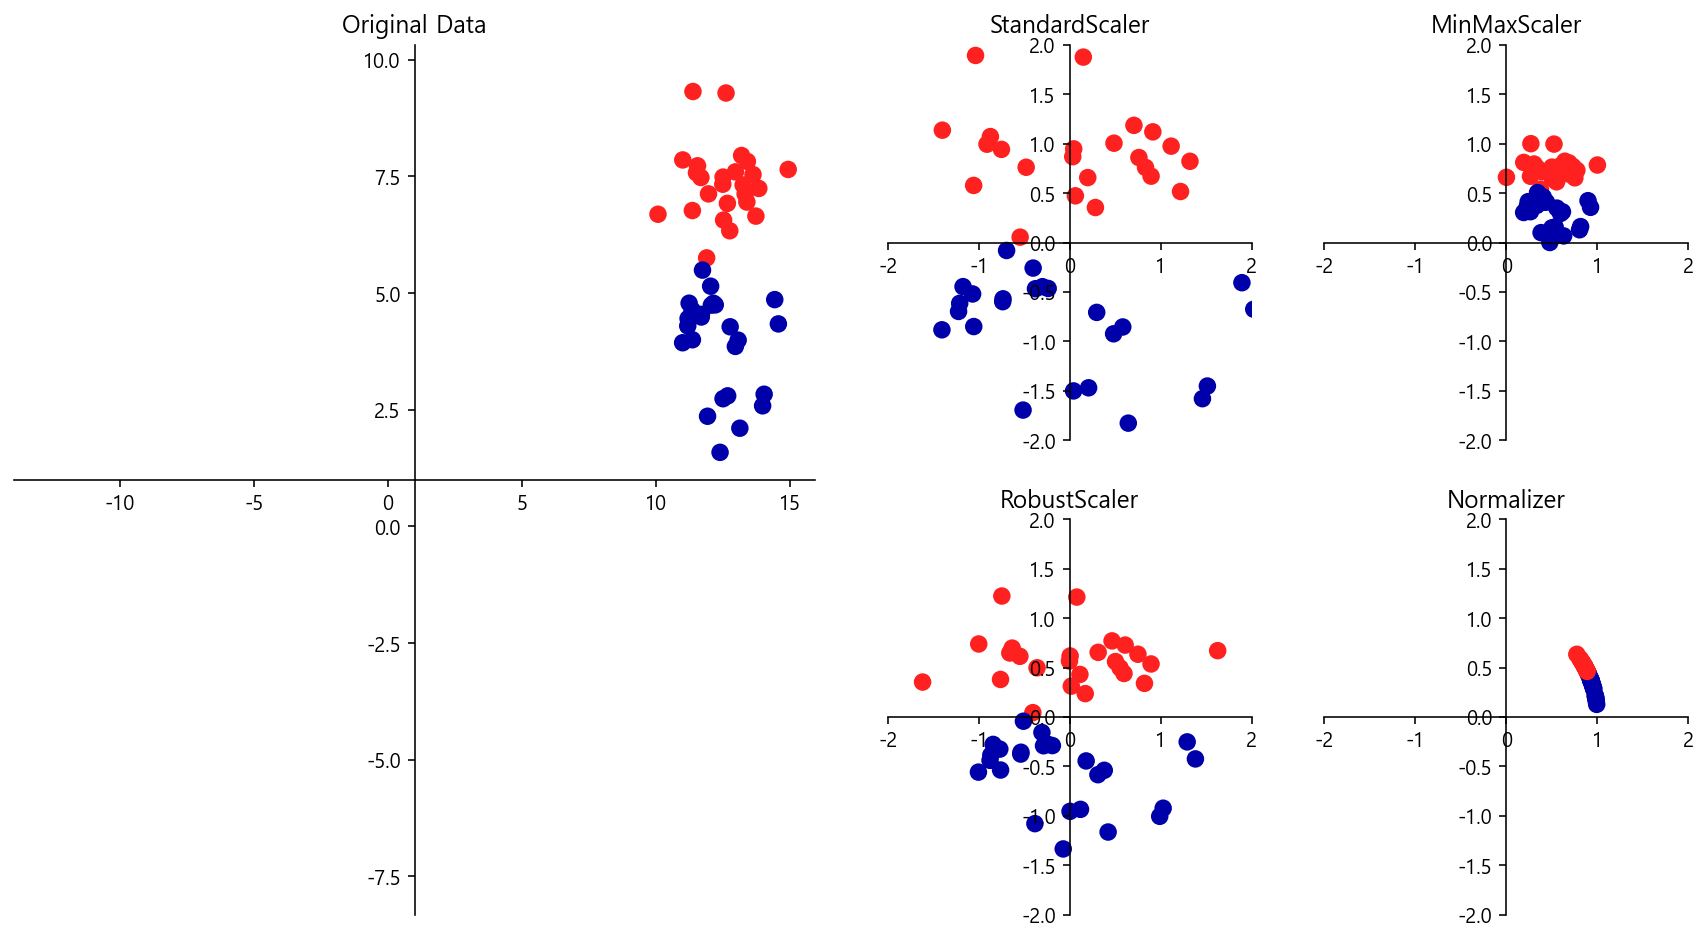

In [5]:
mglearn.plots.plot_scaling()

## 3.3.2 데이터 변환 적용하기

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [7]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [9]:
scaler.fit(X_train)

MinMaxScaler()

In [11]:
X_train_scaled = scaler.transform(X_train)

print('변환된 후 크기 : ', X_train_scaled.shape)
print('스케일 조정 전 특성별 최소값 : \n', X_train.min(axis=0))
print('스케일 조정 전 특성별 최대값 : \n', X_train.max(axis=0))

print('스케일 조정 후 특성별 최소값 : \n', X_train_scaled.min(axis=0))
print('스케일 조정 후 특성별 최대값 : \n', X_train_scaled.max(axis=0))

변환된 후 크기 :  (426, 30)
스케일 조정 전 특성별 최소값 : 
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값 : 
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값 : 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값 : 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


## 3.3.3 QuantileTransformer와 PowerTransformer

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

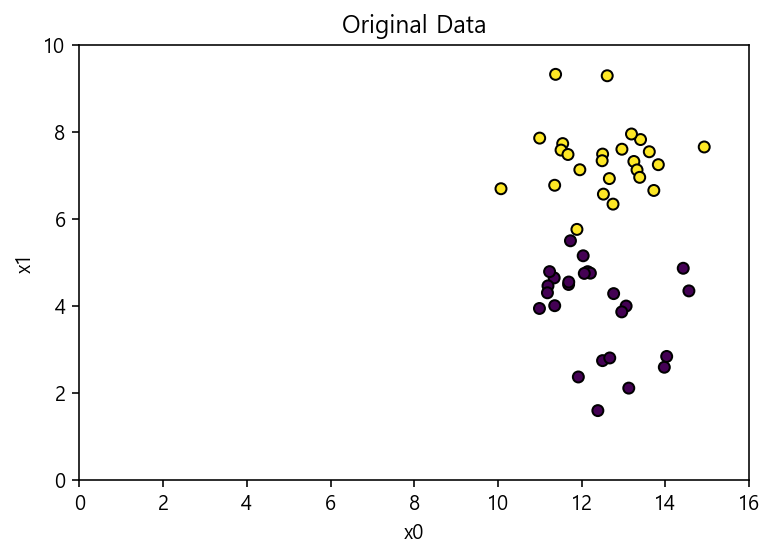

In [57]:
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X+=3

plt.scatter(X[:,0], X[:,1], c=y, s=30, edgecolors='black')
plt.xlim(0,16)
plt.xlabel('x0')
plt.ylim(0,10)
plt.ylabel('x1')
plt.title('Original Data')
plt.show()

#### QuantileTransformer 스케일링 적용

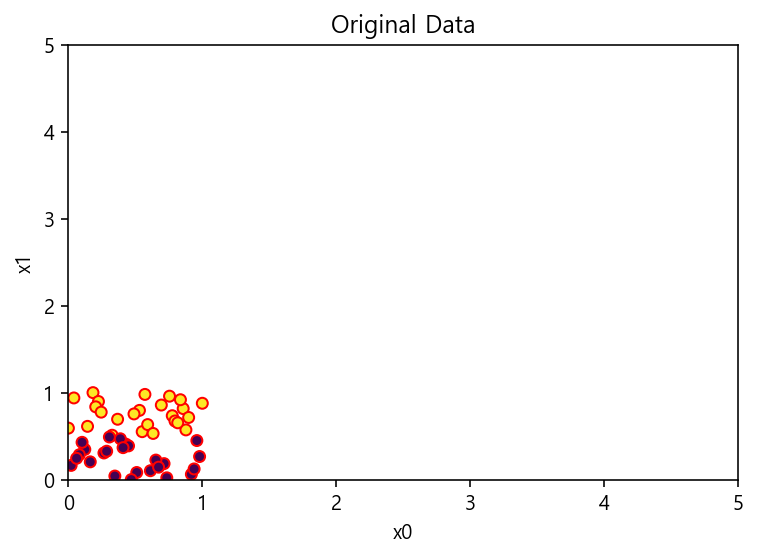

In [62]:
scaler = QuantileTransformer()
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:,0], X_trans[:,1], c=y, s=30, edgecolors='red')
plt.xlim(0,5)
plt.xlabel('x0')
plt.ylim(0,5)
plt.ylabel('x1')
plt.title('Original Data')
plt.show()

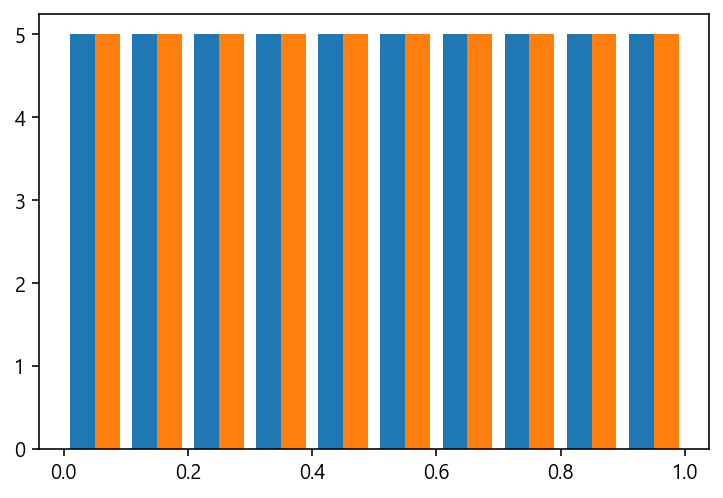

In [59]:
plt.hist(X_trans)
plt.show()

▶ 스케일링 결과, 모든 특성 값이 0과 1사이에 위치하고 있음을 알 수 있다.

In [60]:
print(scaler.quantiles_.shape)

(50, 2)


▶ 50분위수, 2개의 피처로 이루어져있음을 알 수 있다.